In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy import stats
from scipy.stats import norm, skew
warnings.filterwarnings('ignore')

In [3]:
conn=sqlite3.connect('inventory.db')
df=pd.read_sql_query('select * from vendor_sales_summary',conn)
df.head()

,VendorNumber,VendorName,Brand,PurchasePrice,ActualPrice,Description,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,26.27,36.99,Jack Daniels No 7 Black,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,23.19,28.99,Tito's Handmade Vodka,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,18.24,24.99,Absolut 80 Proof,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,22.99,Capt Morgan Spiced Rum,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,29.99,Ketel One Vodka,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10756.0,1.064325e+04,18792.512136,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10756.0,1.802448e+04,12700.566640,58.00,5740.750000,18742.500000,25509.250000,9.063100e+04
PurchasePrice,10756.0,2.432476e+01,108.949251,0.36,6.840000,10.520000,19.470000,5.681810e+03
ActualPrice,10756.0,3.555612e+01,147.812478,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10756.0,8.466346e+02,663.018277,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10756.0,3.136392e+03,11068.301869,1.00,36.000000,263.000000,1978.500000,3.376600e+05
TotalPurchaseDollars,10756.0,3.006739e+04,122767.863224,0.71,454.530000,3669.780000,20724.510000,3.811252e+06
TotalSalesQuantity,10756.0,3.073020e+03,10926.159060,0.00,33.000000,262.500000,1931.000000,3.349390e+05
TotalSalesDollars,10756.0,4.217714e+04,167242.385324,0.00,729.270000,5310.485000,28396.915000,5.101920e+06
TotalSalesPrice,10756.0,1.877998e+04,44868.818270,0.00,289.717500,2867.075000,16095.092500,6.728193e+05


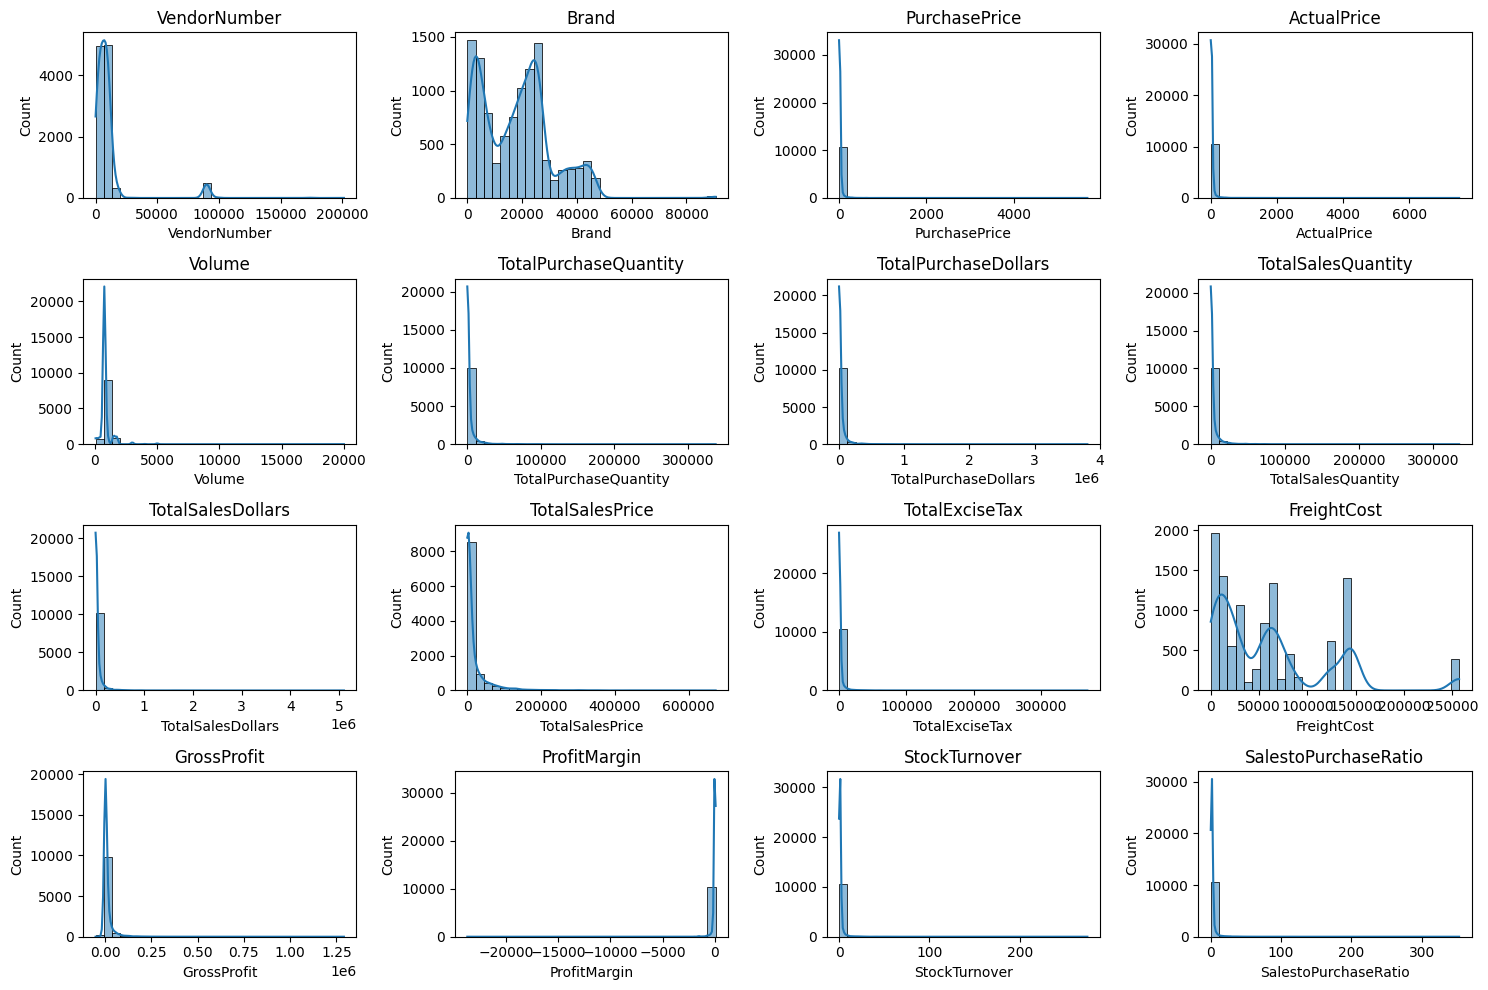

In [6]:
#distribution plots for numerical columns
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    ax=plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    ax.set_title(col)
plt.tight_layout()
plt.show()

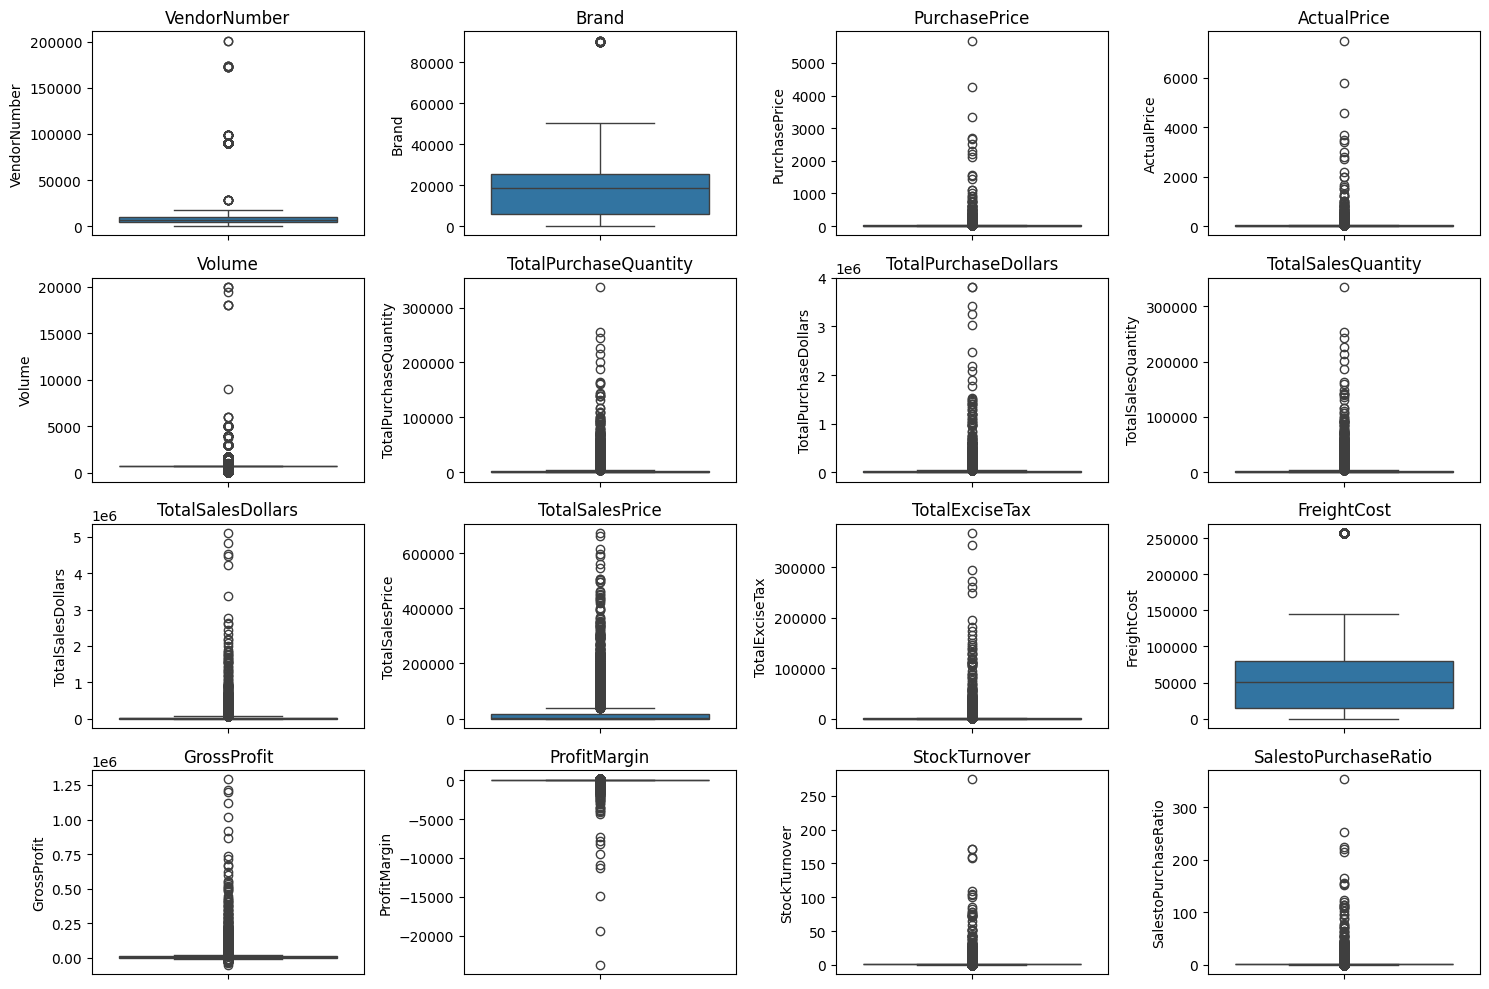

In [7]:
#outlier Detection with boxplot
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    ax=plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    ax.set_title(col)
plt.tight_layout()
plt.show()

In [9]:
#let's filter the data by removing inconsistencies
df=pd.read_sql_query("""select *
from vendor_sales_summary
where GrossProfit>0
and ProfitMargin>0
and TotalSalesQuantity>0""", conn)
df


,VendorNumber,VendorName,Brand,PurchasePrice,ActualPrice,Description,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,26.27,36.99,Jack Daniels No 7 Black,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,23.19,28.99,Tito's Handmade Vodka,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,18.24,24.99,Absolut 80 Proof,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,22.99,Capt Morgan Spiced Rum,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,29.99,Ketel One Vodka,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8603,9815,WINE GROUP INC,8527,1.32,4.99,Concannon Glen Ellen Wh Zin,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8604,8004,SAZERAC CO INC,5683,0.39,0.49,Dr McGillicuddy's Apple Pie,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8605,3924,HEAVEN HILL DISTILLERIES,9123,0.74,0.99,Deep Eddy Vodka,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8606,3960,DIAGEO NORTH AMERICA INC,6127,1.47,1.99,The Club Strawbry Margarita,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


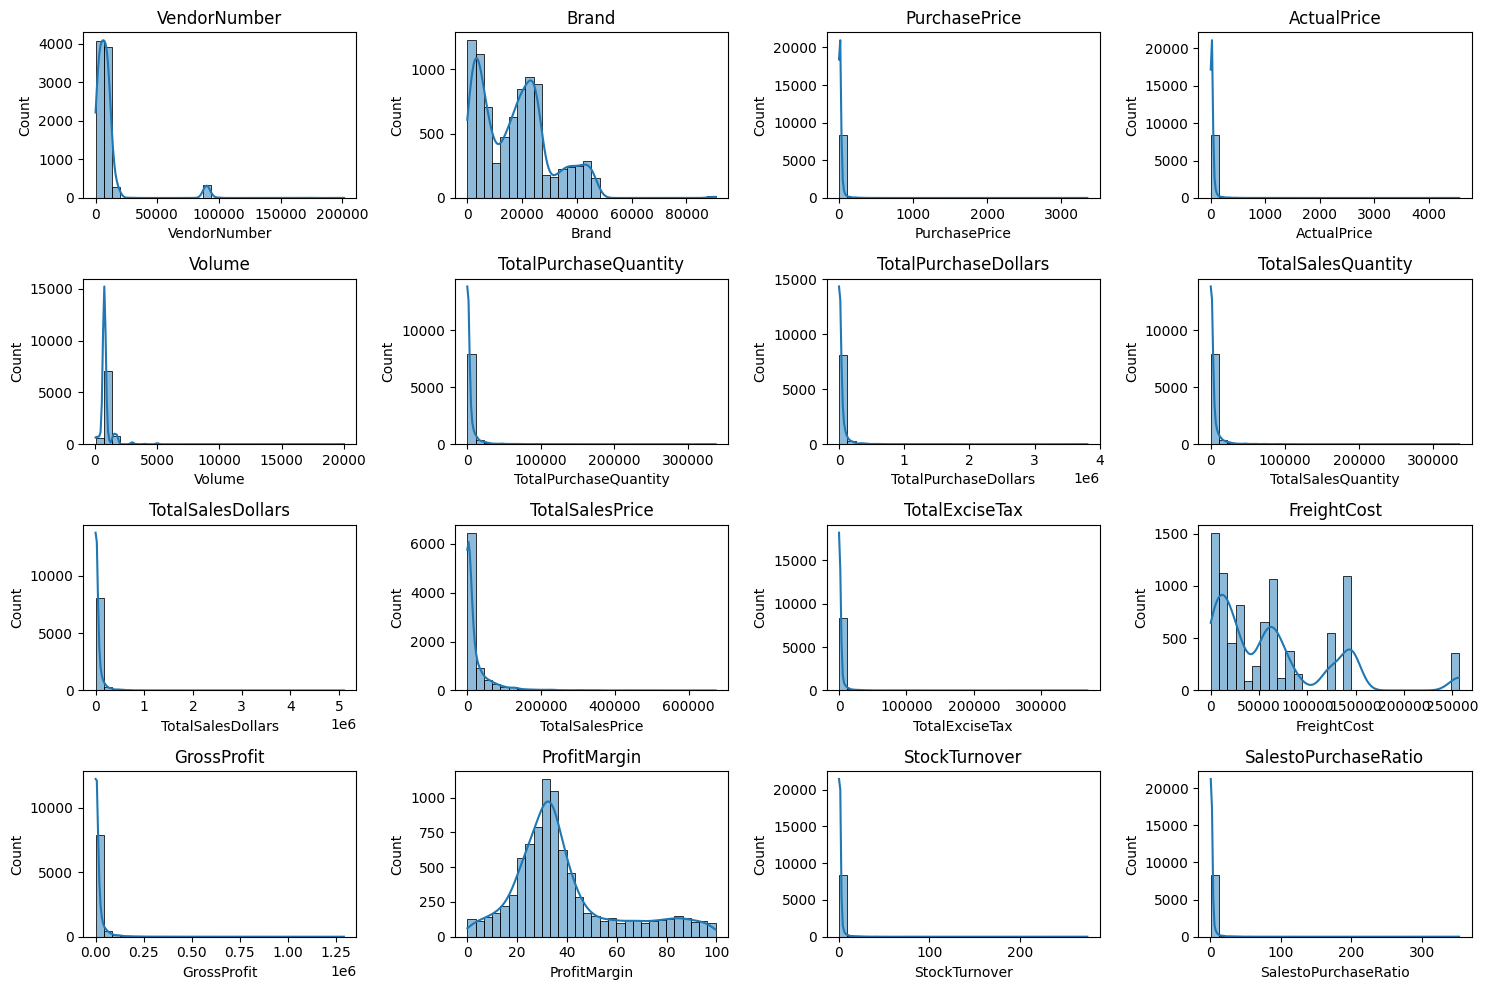

In [10]:
#distribution plots for numerical columns
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    ax=plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    ax.set_title(col)
plt.tight_layout()
plt.show()

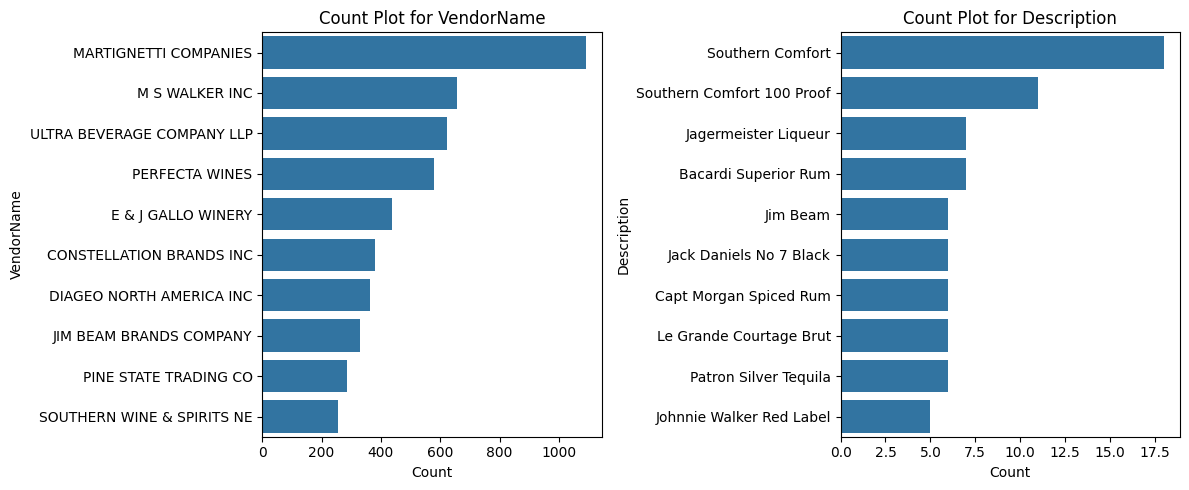

In [11]:
#count plot for categorical columns
categorical_cols=["VendorName","Description"]

plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_cols):
    ax=plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10]) #top 10 categories
    plt.title(f"Count Plot for {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

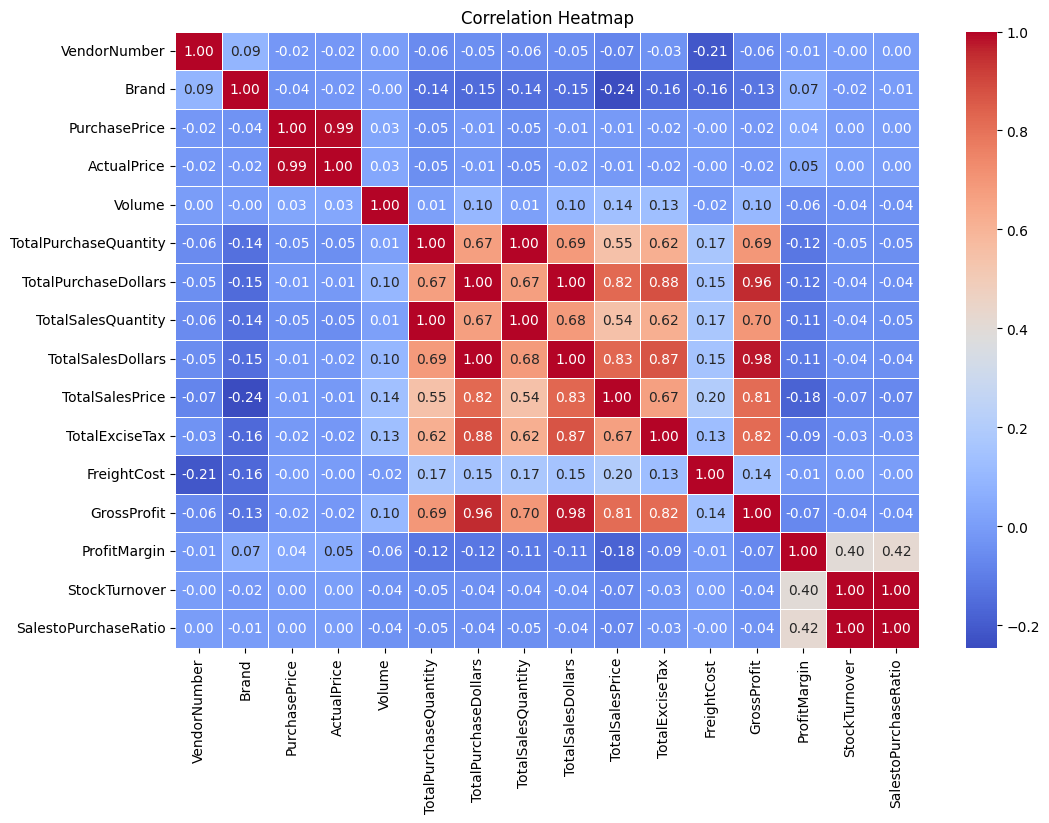

In [15]:
#correlation heatmap
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# Data Analysis
 ### Identify Brands that needs promotional or pricing Adjustments which exhibit lower sales performance but higher profit margin

In [19]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()


In [20]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)


In [21]:
low_sales_threshold

np.float64(560.652)

In [22]:
high_margin_threshold

np.float64(64.97017552750111)

In [23]:
#filter brands with low sales but high profit margin
target_brands=brand_performance[(brand_performance['TotalSalesDollars']<=low_sales_threshold) & (brand_performance['ProfitMargin']>=high_margin_threshold)]
print("Brands with low sales but high profit margin:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margin:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [25]:
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<10000] #for better Visualisation

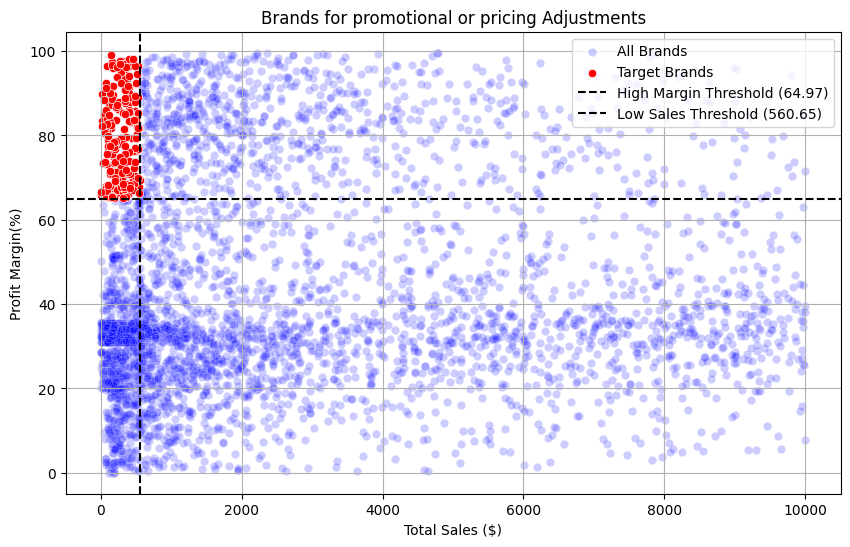

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars',y='ProfitMargin',color="blue",label="All Brands",alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='ProfitMargin',color="red",label="Target Brands")

plt.axhline(high_margin_threshold,color='black',linestyle='--',label=f"High Margin Threshold ({high_margin_threshold:.2f})")
plt.axvline(low_sales_threshold,color='black',linestyle='--',label=f"Low Sales Threshold ({low_sales_threshold:.2f})")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin(%)")
plt.title("Brands for promotional or pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


### Which vendors and brands demonstrate the highest sales performance?

In [92]:
def format_dollars(value):
   if value>=1000000:
       return f"${value/1000000:.2f}M"
   elif value>=1000:
        return f"${value/1000:.2f}K"
   else:
        return f"${value:.2f}"

In [27]:
#Top Vendors and Brands by Sales Performance
top_vendors=df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands=df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.944209e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
BROWN-FORMAN CORP             1.910928e+07
E & J GALLO WINERY            1.839990e+07
ULTRA BEVERAGE COMPANY LLP    1.653210e+07
M S WALKER INC                1.472994e+07
Name: TotalSalesDollars, dtype: float64

In [28]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [93]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    $7.96M
Tito's Handmade Vodka      $7.40M
Grey Goose Vodka           $7.21M
Capt Morgan Spiced Rum     $6.36M
Absolut 80 Proof           $6.24M
Jameson Irish Whiskey      $5.72M
Ketel One Vodka            $5.07M
Baileys Irish Cream        $4.15M
Kahlua                     $3.60M
Tanqueray                  $3.46M
Name: TotalSalesDollars, dtype: object

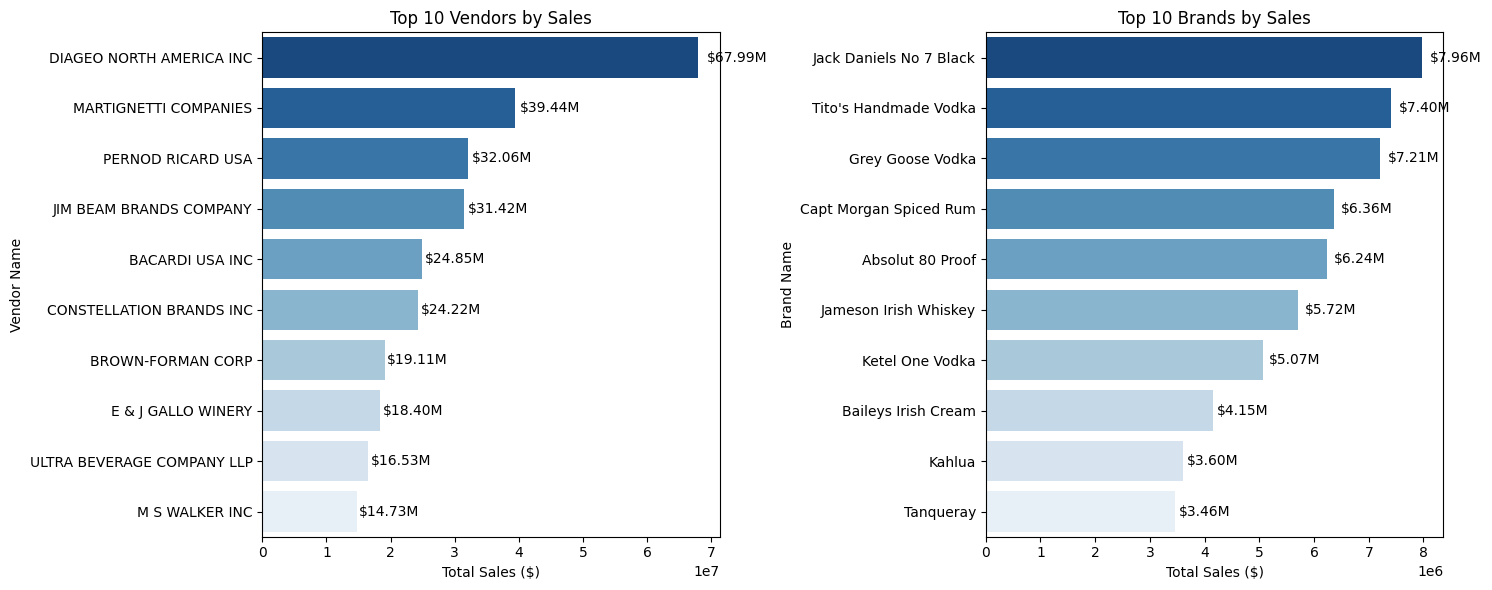

In [35]:
plt.figure(figsize=(15,6))

#plot for top vendors

plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index,x=top_vendors.values,palette='Blues_r')
plt.title("Top 10 Vendors by Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("Vendor Name")
for bar in ax1.patches:
    ax1.text(bar.get_width()+(bar.get_width()*0.02),
             bar.get_y()+bar.get_height()/2,
             format_dollars(bar.get_width()),
             va='center',
             ha='left',fontsize=10,color='black')
#plot for top brands
plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands.index,x=top_brands.values,palette='Blues_r')
plt.title("Top 10 Brands by Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("Brand Name")
  
for bar in ax2.patches:
    ax2.text(bar.get_width()+(bar.get_width()*0.02),
             bar.get_y()+bar.get_height()/2,
             format_dollars(bar.get_width()),
             va='center',
             ha='left',fontsize=10,color='black')
plt.tight_layout()
plt.show()

### Which vendors contribute the most to total purchase dollars?

In [38]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'TotalSalesDollars':'sum',
    'GrossProfit':'sum'
}).reset_index()


In [39]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [51]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [52]:
#display the top 10 vendors
top_vendors=vendor_performance.head(10)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(lambda x: format_dollars(x))
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(lambda x: format_dollars(x))
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(lambda x: format_dollars(x))
top_vendors

,VendorName,TotalPurchaseDollars,TotalSalesDollars,GrossProfit,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,$50.10M,$67.99M,$17.89M,16.23
57,MARTIGNETTI COMPANIES,$25.56M,$39.44M,$13.88M,8.28
68,PERNOD RICARD USA,$23.85M,$32.06M,$8.21M,7.73
46,JIM BEAM BRANDS COMPANY,$23.49M,$31.42M,$7.93M,7.61
6,BACARDI USA INC,$17.43M,$24.85M,$7.42M,5.65
20,CONSTELLATION BRANDS INC,$15.27M,$24.22M,$8.95M,4.95
11,BROWN-FORMAN CORP,$13.78M,$19.11M,$5.33M,4.47
30,E & J GALLO WINERY,$12.07M,$18.40M,$6.33M,3.91
106,ULTRA BEVERAGE COMPANY LLP,$11.19M,$16.53M,$5.34M,3.63
79,SAZERAC CO INC,$10.26M,$13.75M,$3.49M,3.33


In [53]:
vendor_performance.shape

(119, 5)

In [54]:
top_vendors['PurchaseContribution%'].sum()

np.float64(65.79)

In [55]:
top_vendors['Cumulative_contribution%']=top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,TotalSalesDollars,GrossProfit,PurchaseContribution%,Cumulative_contribution%
25,DIAGEO NORTH AMERICA INC,$50.10M,$67.99M,$17.89M,16.23,16.23
57,MARTIGNETTI COMPANIES,$25.56M,$39.44M,$13.88M,8.28,24.51
68,PERNOD RICARD USA,$23.85M,$32.06M,$8.21M,7.73,32.24
46,JIM BEAM BRANDS COMPANY,$23.49M,$31.42M,$7.93M,7.61,39.85
6,BACARDI USA INC,$17.43M,$24.85M,$7.42M,5.65,45.50
20,CONSTELLATION BRANDS INC,$15.27M,$24.22M,$8.95M,4.95,50.45
11,BROWN-FORMAN CORP,$13.78M,$19.11M,$5.33M,4.47,54.92
30,E & J GALLO WINERY,$12.07M,$18.40M,$6.33M,3.91,58.83
106,ULTRA BEVERAGE COMPANY LLP,$11.19M,$16.53M,$5.34M,3.63,62.46
79,SAZERAC CO INC,$10.26M,$13.75M,$3.49M,3.33,65.79


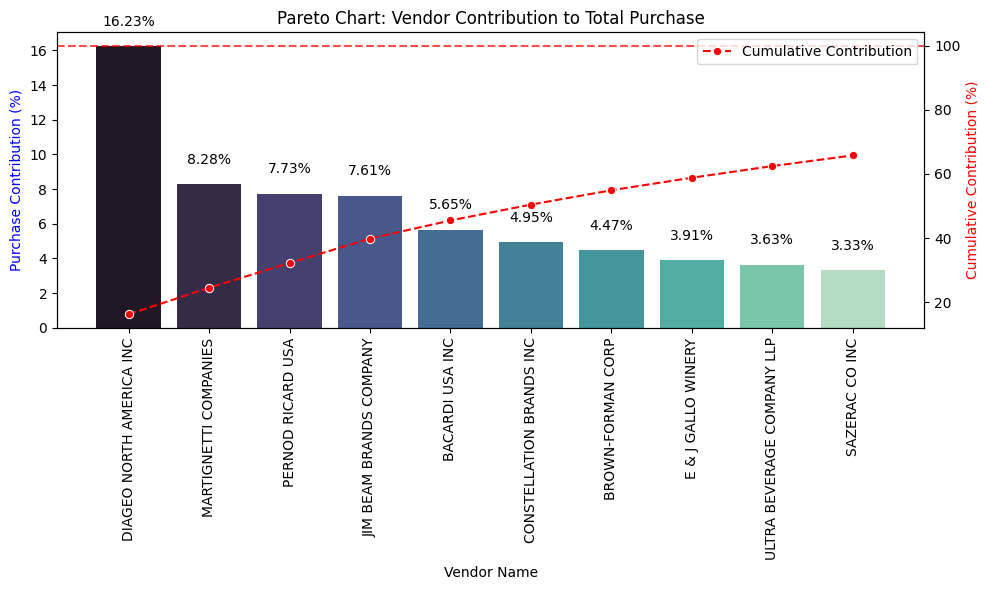

In [64]:
#Pareto Chart 
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar plot for purchase contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], ax=ax1, palette='mako')
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value + 1, f"{value}%", ha='center', va='bottom', fontsize=10, color='black')

# Line plot for cumulative contribution%
ax2 = ax1.twinx()
sns.lineplot(x=top_vendors['VendorName'], y=top_vendors['Cumulative_contribution%'],
             ax=ax2, color='red', marker='o', linestyle='dashed', label='Cumulative Contribution')

ax1.set_ylabel('Purchase Contribution (%)', color='blue')
ax2.set_ylabel('Cumulative Contribution (%)', color='red')
ax1.set_xlabel('Vendor Name')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchase')
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax2.axhline(y=100, color='red', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

### How much of total procurement is dependent on the top vendors?

In [69]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")
                                                               

Total Purchase Contribution of top 10 vendors is 65.79%


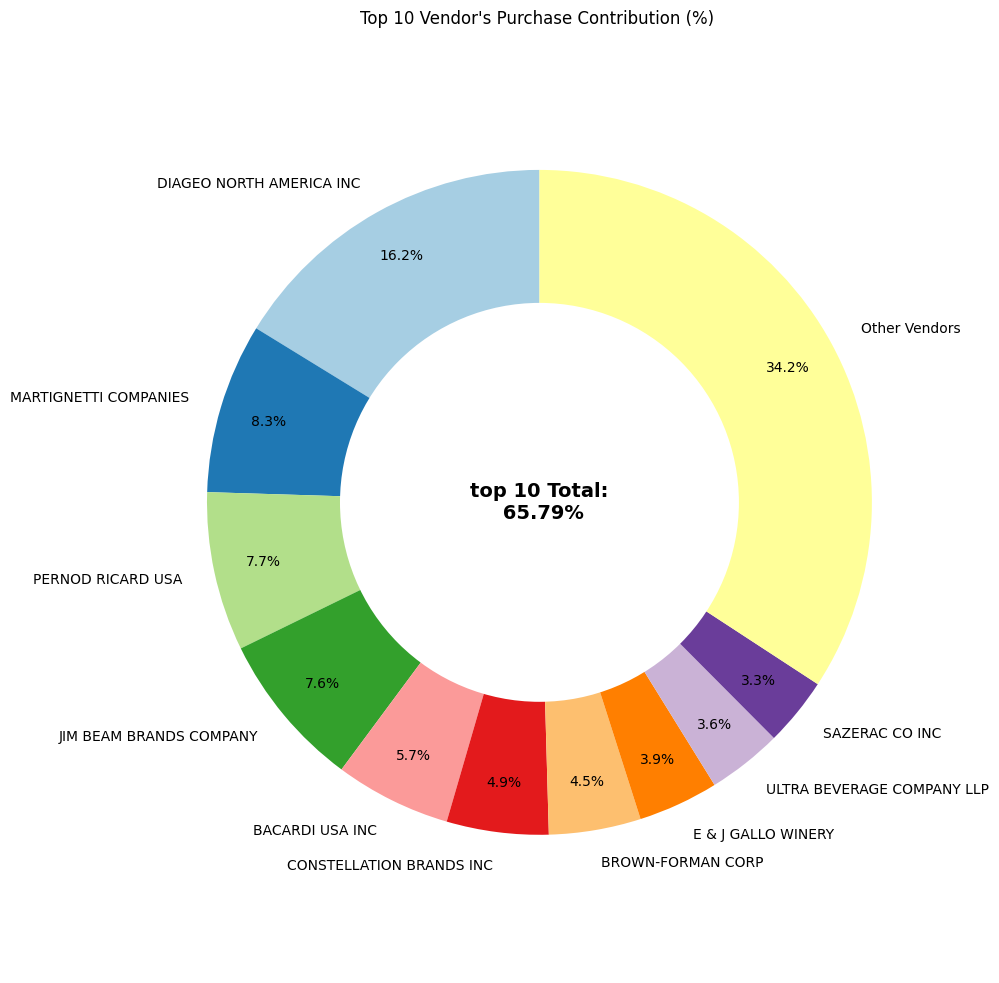

In [75]:
vendors= list(top_vendors['VendorName'].values)
purchase_contributions =list(top_vendors['PurchaseContribution%'].values)
total_contribution=sum(purchase_contributions)
remaining_contribution=100-total_contribution

#Append "other vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

#donut chart
fig,ax =plt.subplots(figsize=(10,10))
wedges,texts, autotexts=ax.pie(purchase_contributions,labels=vendors,autopct='%1.1f%%',startangle=90,pctdistance=0.85,colors=plt.cm.Paired.colors)

#Draw a white circle in the center to create a donut effect
centre_circle=plt.Circle((0,0),0.60,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)

#Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

#Add total contribution annotation in the center
plt.text(0,0, f"top 10 Total:\n{total_contribution: .2f}%",fontsize=14,fontweight='bold',ha='center',va='center')
plt.title("Top 10 Vendor's Purchase Contribution (%) ")
plt.tight_layout()
plt.show()

### Does the ourchasing in bulk reduce the unit pricec, and what ids the optimal purchase volume for cost savings?

In [79]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

df['OrderSize']=pd.qcut(df['TotalPurchaseQuantity'],q=3,labels=['Small','Medium','Large'])

In [82]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8603,Small,2
8604,Small,6
8605,Small,2
8606,Small,1


In [83]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,38.925397
Medium,15.481318
Large,10.776483


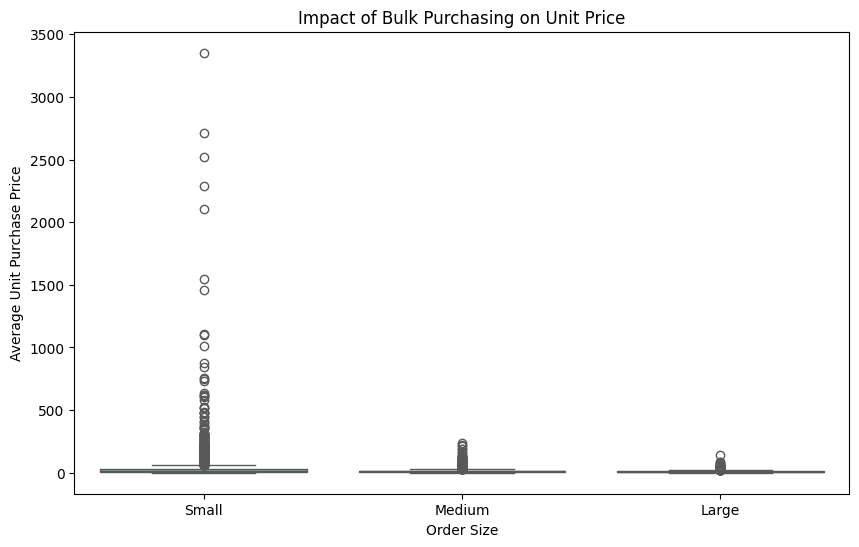

In [84]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='OrderSize',y='UnitPurchasePrice',palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

### Which Vendors have low inventory turnover,indicating excess sstock and slow-moving products?

In [88]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
PARK STREET IMPORTS LLC,0.699412
HIGHLAND WINE MERCHANTS LLC,0.708333
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


### How much capital is locked in unusal inventory  per vendor, and which vendors contribute the most to it?

In [89]:
df['UnsoldInventoryValue']=(df["TotalPurchaseQuantity"]-df['TotalSalesQuantity'])*df['PurchasePrice']
print('TOtal Unsold Capital:',format_dollars(df['UnsoldInventoryValue'].sum()))

TOtal Unsold Capital: $2.68M


In [95]:
## Aggregate capital locked per vendor
inventory_value_per_vendor=df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

#sort vendors with the highest locked inventory
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue',ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue']=inventory_value_per_vendor['UnsoldInventoryValue'].apply(lambda x: format_dollars(x))
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,$722.21K
46,JIM BEAM BRANDS COMPANY,$554.67K
68,PERNOD RICARD USA,$470.63K
116,WILLIAM GRANT & SONS INC,$401.96K
79,SAZERAC CO INC,$296.95K
30,E & J GALLO WINERY,$228.28K
20,CONSTELLATION BRANDS INC,$133.62K
61,MOET HENNESSY USA INC,$126.48K
77,REMY COINTREAU USA INC,$118.60K
54,MAJESTIC FINE WINES,$114.46K


### What is the 95% confidence interval for profit margins of top-performing and low-performing vendors

In [96]:
top_threshold=df["TotalSalesDollars"].quantile(0.75)
low_threshold=df["TotalSalesDollars"].quantile(0.25)

In [100]:
top_vendors=df[df['TotalSalesDollars']>=top_threshold]["ProfitMargin"].dropna()
low_vendors=df[df['TotalSalesDollars']<=low_threshold]["ProfitMargin"].dropna()

In [101]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3547    79.684817
3707    85.782102
4780    93.085860
4949    95.012530
5079    94.271857
Name: ProfitMargin, Length: 2152, dtype: float64

In [102]:
low_vendors

5662     4.111764
5683     6.145626
5732    12.007271
5735     1.677308
5755     7.239599
          ...    
8603    83.448276
8604    96.436186
8605    25.252525
8606    98.974037
8607    99.166079
Name: ProfitMargin, Length: 2152, dtype: float64

In [103]:
def confidence_interval(data,confidence=0.95):
  mean_val=np.mean(data)
  std_err=np.std(data,ddof=1)/np.sqrt(len(data)) #standard error
  margin_of_error=stats.t.ppf((1+confidence)/2,df=len(data)-1)*std_err
  confidence_interval=(mean_val,mean_val-margin_of_error,mean_val+margin_of_error)
  return confidence_interval

Top Vendors 95% Confidence Interval:(30.74,31.62),Mean:31.18
Low Vendors 95% Confidence Interval:(40.53,42.67)Mean:41.60


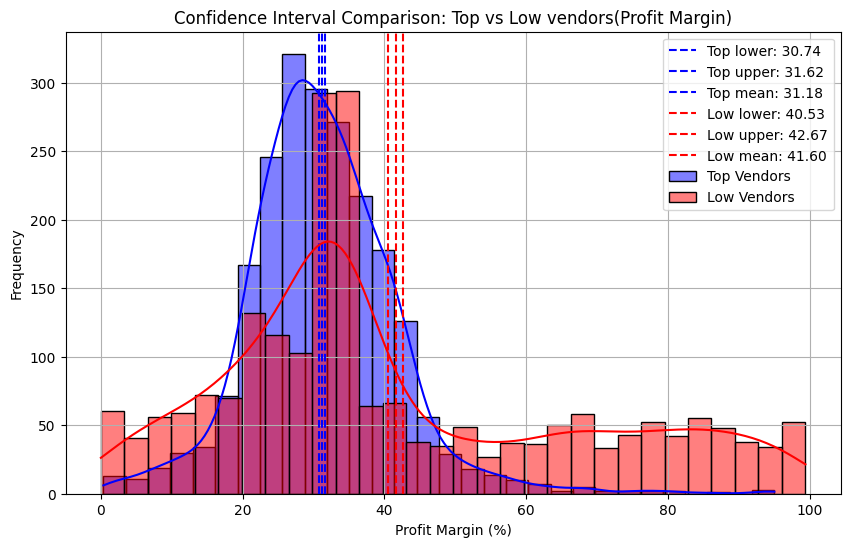

In [106]:
top_mean,top_lower,top_upper=confidence_interval(top_vendors)
low_mean,low_lower,low_upper=confidence_interval(low_vendors)

print(f'Top Vendors 95% Confidence Interval:({top_lower:.2f},{top_upper:.2f}),Mean:{top_mean:.2f}')
print(f'Low Vendors 95% Confidence Interval:({low_lower:.2f},{low_upper:.2f})Mean:{low_mean:.2f}')

plt.figure(figsize=(10,6))

#top vendors plot
sns.histplot(top_vendors,bins=30,kde=True,color='blue',alpha=0.5,label='Top Vendors')
plt.axvline(x=top_lower,color='blue',linestyle='--',label=f'Top lower: {top_lower:.2f}')
plt.axvline(x=top_upper,color='blue',linestyle='--',label=f'Top upper: {top_upper:.2f}')
plt.axvline(x=top_mean,color='blue',linestyle='--',label=f'Top mean: {top_mean:.2f}')

#low vendors plot
sns.histplot(low_vendors,bins=30,kde=True,color='red',alpha=0.5,label='Low Vendors')
plt.axvline(x=low_lower,color='red',linestyle='--',label=f'Low lower: {low_lower:.2f}')
plt.axvline(x=low_upper,color='red',linestyle='--',label=f'Low upper: {low_upper:.2f}')
plt.axvline(x=low_mean,color='red',linestyle='--',label=f'Low mean: {low_mean:.2f}')

#finalize plot
plt.title('Confidence Interval Comparison: Top vs Low vendors(Profit Margin)')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

### Is there a significant difference in profit margin between top-performing and low-performing vendors?
H0(Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors\
H1(Alternative Hypothesis): The mean profit margind of the top-performingn and low-performing vendors are significantly different

In [107]:
### Is there a significant difference in profit margin between top-performing and low-performing vendors?
# H0(Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors
# H1(Alternative Hypothesis): The mean profit margind of the top-performingn and low-performing vendors are significantly different
top_threshold=df["TotalSalesDollars"].quantile(0.75)
low_threshold=df["TotalSalesDollars"].quantile(0.25)

top_vendors=df[df['TotalSalesDollars']>=top_threshold]["ProfitMargin"].dropna()
low_vendors=df[df['TotalSalesDollars']<=low_threshold]["ProfitMargin"].dropna()

#perform two-sample T-test
t_stat,p_value=stats.ttest_ind(top_vendors,low_vendors,equal_var=False)

#print result
print(f"T-statistic:{t_stat:.4f}")
print(f"P-value:{p_value:.4f}")
if p_value<0.05:
    print("Reject the null hypothesis.There is a significant difference in the mean profit margins of top-performing and low-performing vendors.")
else:
    print("Fail to reject the null hypothesis.There is no significant difference in the mean profit margins of top-performing and low-performing vendors.")

T-statistic:-17.7331
P-value:0.0000
Reject the null hypothesis.There is a significant difference in the mean profit margins of top-performing and low-performing vendors.


In [109]:
pd.read_sql_query('select * from vendor_sales_summary',conn)

,VendorNumber,VendorName,Brand,PurchasePrice,ActualPrice,Description,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,26.27,36.99,Jack Daniels No 7 Black,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,23.19,28.99,Tito's Handmade Vodka,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,18.24,24.99,Absolut 80 Proof,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,22.99,Capt Morgan Spiced Rum,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,29.99,Ketel One Vodka,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10751,9815,WINE GROUP INC,8527,1.32,4.99,Concannon Glen Ellen Wh Zin,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10752,8004,SAZERAC CO INC,5683,0.39,0.49,Dr McGillicuddy's Apple Pie,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10753,3924,HEAVEN HILL DISTILLERIES,9123,0.74,0.99,Deep Eddy Vodka,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
10754,3960,DIAGEO NORTH AMERICA INC,6127,1.47,1.99,The Club Strawbry Margarita,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


In [112]:
df.to_csv('data/vendor_sales_summary.csv', index=False)